In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 📌 Lista de tareas principales

1. Representa una clasificación del nº de clientes por estado (Si consideras que hay demasiados estados representa el top 5). Paso siguiente crea una tabla donde se representen los estados, las ciudades que pertenecen a esos estados y el numero de clientes en esas ciudades. Ademas de eso, la tabla y todos los graficos representados deberan de ser dinamicos respecto a la fecha  

In [296]:
df=pd.read_csv('C:/Users/mguadalupe/Desktop/proyecto_interno01_OlistData/datasets_limpios/olist_order_customer.csv')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,sp
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,sp
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,sp


In [297]:
#clasificamos el numero de clientes por estado
clientes_por_estado = df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False)
clientes_por_estado.head(5)

customer_state
sp    40302
rj    12384
mg    11259
rs     5277
pr     4882
Name: customer_unique_id, dtype: int64

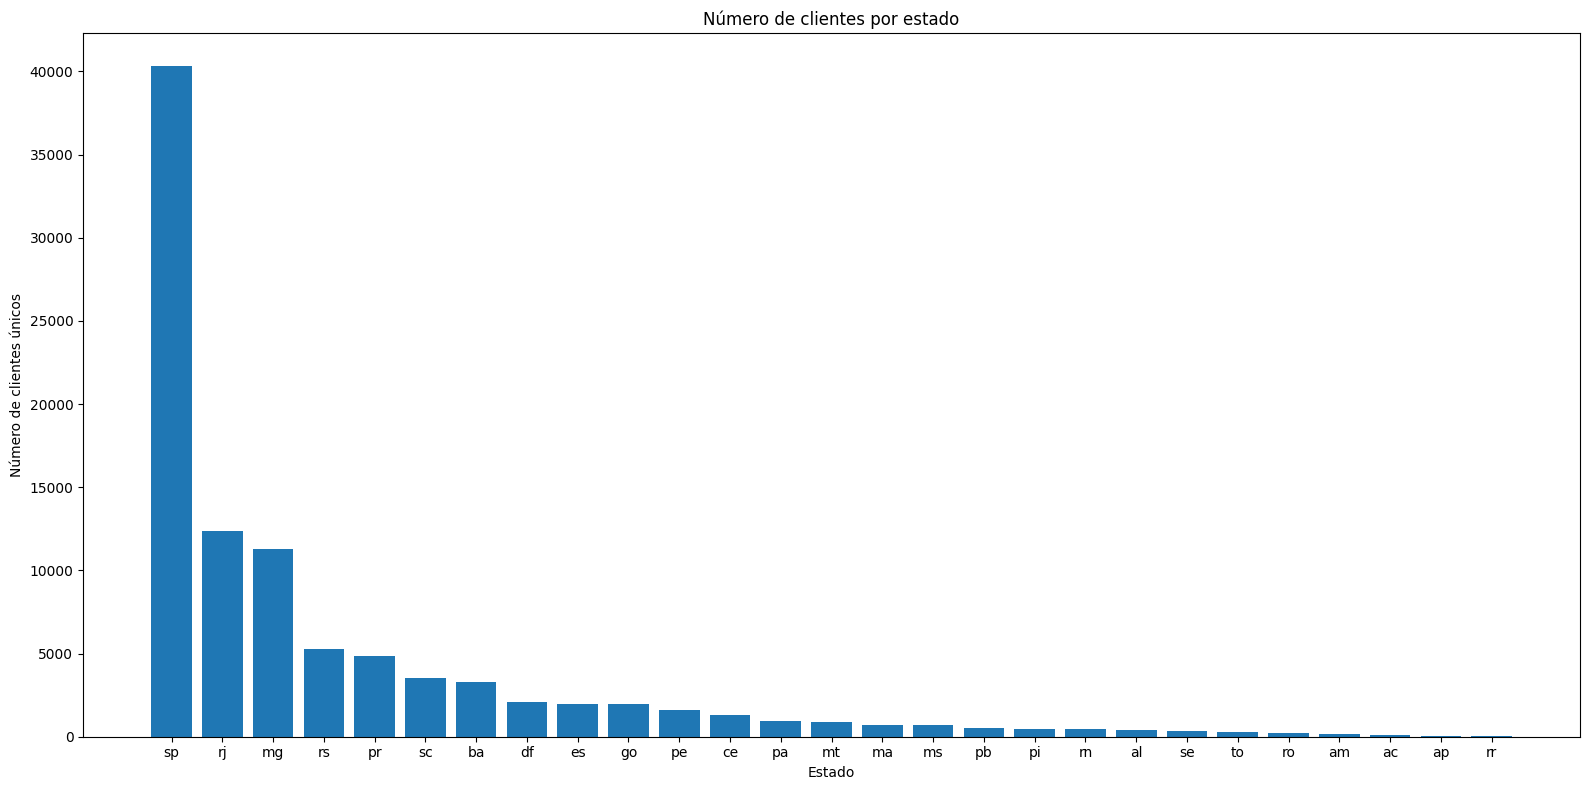

In [298]:
#representación gráfica de la clasificiación anterior
plt.figure(figsize=(16, 8))
plt.bar(clientes_por_estado.index, clientes_por_estado.values)
plt.title('Número de clientes por estado')
plt.xlabel('Estado')
plt.ylabel('Número de clientes únicos')
plt.tight_layout()
plt.show()

2. Añade a la tabla anterior dos columnas (nº pedidos y el porcentaje respecto al total de pedidos), y el ratio del numero de pedido medio por cliente, representa la información en el grafico que consideres oportuno ¿Que te transmite esta informacion? ¿Que acciones como analista de datos crees que deberia de tomar la empresa para mejorar sus ventas? 

In [299]:
#Representación en una tabla de los estados, las ciudades a las que pertenece ese estado y el numero de clientes en esas ciudades
clientes_por_ciudad=df.groupby(['customer_state','customer_city'])['customer_unique_id'].count().reset_index()
clientes_por_ciudad.columns=['Estado','Ciudad','Número de clientes']
clientes_por_ciudad=clientes_por_ciudad.sort_values(['Estado', 'Número de clientes'], ascending=[True, False])
clientes_por_ciudad.head(10)

,Estado,Ciudad,Número de clientes
5,ac,rio branco,70
1,ac,cruzeiro do sul,3
6,ac,senador guiomard,2
7,ac,xapuri,2
0,ac,brasileia,1
2,ac,epitaciolandia,1
3,ac,manoel urbano,1
4,ac,porto acre,1
36,al,maceio,247
10,al,arapiraca,29


In [300]:
#voy a calcular el numero de pedidos por ciudad
pedidos_por_ciudad = df.groupby(['customer_state', 'customer_city'])['customer_id'].count().reset_index()
pedidos_por_ciudad.columns = ['Estado', 'Ciudad', 'Número de pedidos']
pedidos_por_ciudad = pedidos_por_ciudad.sort_values(['Estado', 'Número de pedidos'], ascending=[True, False])
pedidos_por_ciudad.head(10)


,Estado,Ciudad,Número de pedidos
5,ac,rio branco,70
1,ac,cruzeiro do sul,3
6,ac,senador guiomard,2
7,ac,xapuri,2
0,ac,brasileia,1
2,ac,epitaciolandia,1
3,ac,manoel urbano,1
4,ac,porto acre,1
36,al,maceio,247
10,al,arapiraca,29


In [301]:
#añado a la tabla anterior dos columnas, una con el numero de pedidos y otra con el porcentaje respecto al total de pedidos
total_pedidos = pedidos_por_ciudad['Número de pedidos'].sum()
pedidos_por_ciudad['Porcentaje'] = ((pedidos_por_ciudad['Número de pedidos'] / total_pedidos )* 100).round(2)
pedidos_por_ciudad.head(10)

,Estado,Ciudad,Número de pedidos,Porcentaje
5,ac,rio branco,70,0.07
1,ac,cruzeiro do sul,3,0.00
6,ac,senador guiomard,2,0.00
7,ac,xapuri,2,0.00
0,ac,brasileia,1,0.00
2,ac,epitaciolandia,1,0.00
3,ac,manoel urbano,1,0.00
4,ac,porto acre,1,0.00
36,al,maceio,247,0.25
10,al,arapiraca,29,0.03


In [302]:
pedidos_por_ciudad['Ratio de Pedidos por Cliente'] = pedidos_por_ciudad['Número de pedidos'] / clientes_por_ciudad['Número de clientes']
pedidos_por_ciudad.head(10)

,Estado,Ciudad,Número de pedidos,Porcentaje,Ratio de Pedidos por Cliente
5,ac,rio branco,70,0.07,1.0
1,ac,cruzeiro do sul,3,0.00,1.0
6,ac,senador guiomard,2,0.00,1.0
7,ac,xapuri,2,0.00,1.0
0,ac,brasileia,1,0.00,1.0
2,ac,epitaciolandia,1,0.00,1.0
3,ac,manoel urbano,1,0.00,1.0
4,ac,porto acre,1,0.00,1.0
36,al,maceio,247,0.25,1.0
10,al,arapiraca,29,0.03,1.0


In [ ]:
#juntamos las dos tablas para poder hacer el gráfico
tabla = pedidos_por_ciudad.merge(clientes_por_ciudad, on=['Estado', 'Ciudad'])
tabla

,Estado,Ciudad,Número de pedidos,Porcentaje,Ratio de Pedidos por Cliente,Número de clientes
0,ac,rio branco,70,0.07,1.0,70
1,ac,cruzeiro do sul,3,0.00,1.0,3
2,ac,senador guiomard,2,0.00,1.0,2
3,ac,xapuri,2,0.00,1.0,2
4,ac,brasileia,1,0.00,1.0,1
...,...,...,...,...,...,...
4305,to,pium,1,0.00,1.0,1
4306,to,praia norte,1,0.00,1.0,1
4307,to,pugmil,1,0.00,1.0,1
4308,to,sandolandia,1,0.00,1.0,1


C:\Users\mguadalupe\AppData\Local\Temp\ipykernel_7412\2852763305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


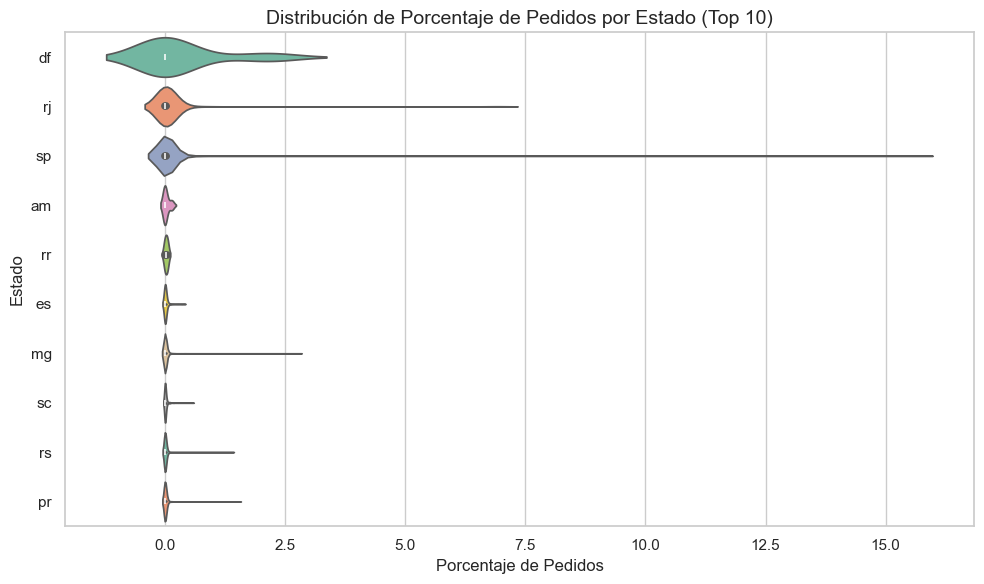

In [361]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=pedidos_por_ciudad,
    x='Porcentaje',
    y='Estado',
    order=pedidos_por_ciudad.groupby('Estado')['Porcentaje'].mean().sort_values(ascending=False).head(10).index,
    palette='Set2'
)

plt.title('Distribución de Porcentaje de Pedidos por Estado (Top 10)', fontsize=14)
plt.xlabel('Porcentaje de Pedidos')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

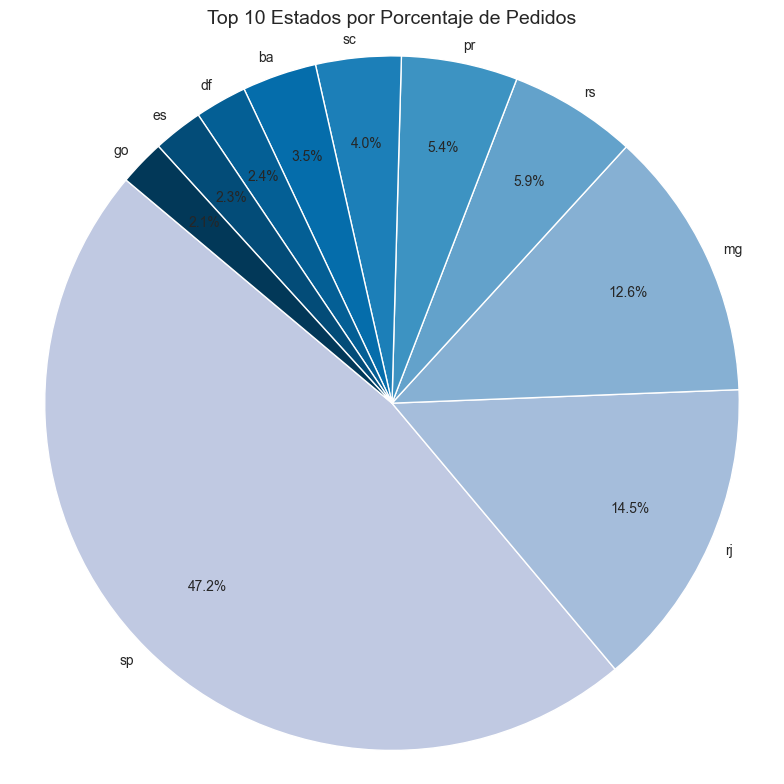

In [364]:
df_estados = pedidos_por_ciudad.groupby('Estado')['Porcentaje'].sum().reset_index()
top10_estados = df_estados.sort_values(by='Porcentaje', ascending=False).head(10)

plt.figure(figsize=(8, 8))
colors = plt.cm.PuBu(np.linspace(0.3, 1, len(top10_estados)))

plt.pie(
    top10_estados['Porcentaje'],
    labels=top10_estados['Estado'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10},
    wedgeprops=dict(edgecolor='white'),
    labeldistance=1.05,
    pctdistance=0.75
)
plt.title('Top 10 Estados por Porcentaje de Pedidos', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


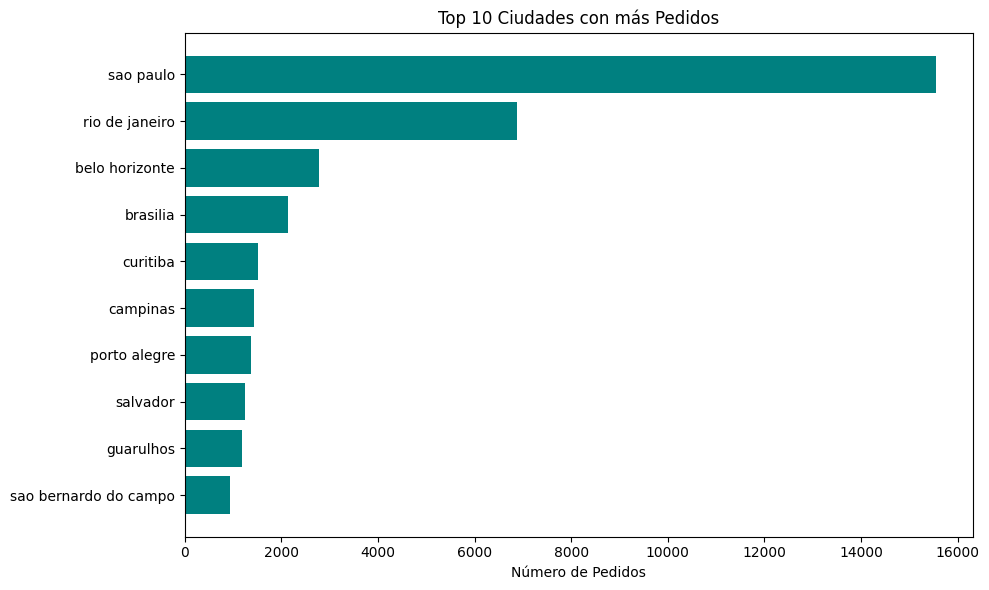

In [ ]:
#gráfico para ver las 10 ciudades con más pedidos
top_ciudades = tabla.sort_values('Número de pedidos', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_ciudades['Ciudad'], top_ciudades['Número de pedidos'], color='teal')
plt.xlabel('Número de Pedidos')
plt.title('Top 10 Ciudades con más Pedidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

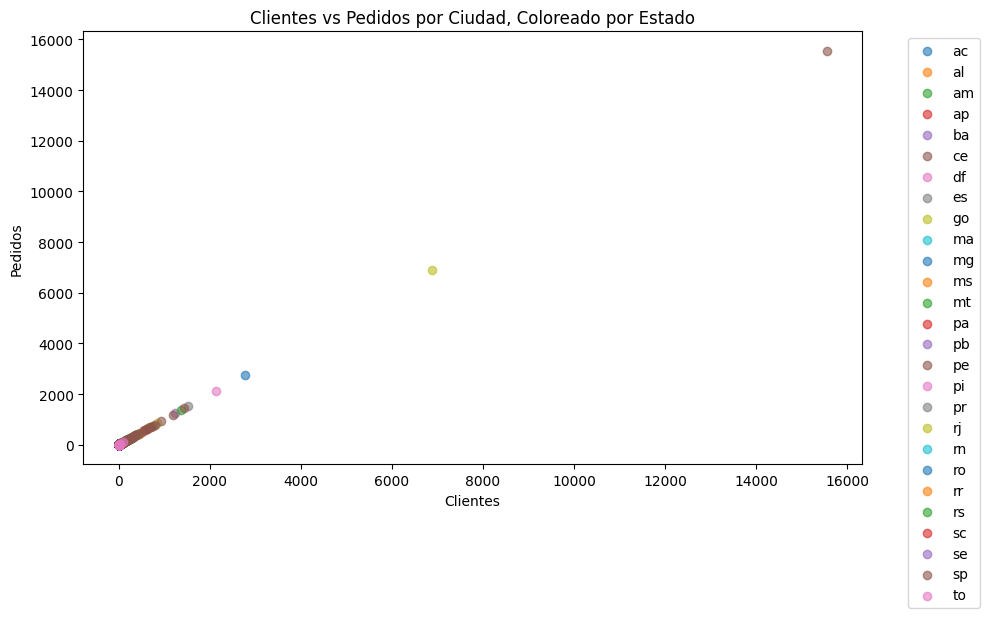

In [305]:
#Gráfico de dispersión coloreado por estado
plt.figure(figsize=(10,6))
states = tabla['Estado'].unique()
for state in states:
    subset = tabla[tabla['Estado'] == state]
    plt.scatter(subset['Número de clientes'], subset['Número de pedidos'], label=state, alpha=0.6)

plt.xlabel('Clientes')
plt.ylabel('Pedidos')
plt.title('Clientes vs Pedidos por Ciudad, Coloreado por Estado')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

4. Calcula y representa el numero de reviews por estado y el score medio en cada una de ellas, como ya hemos tenido en cuenta los pedidos con retraso en la seccion anterior vamos a eliminar estos datos del apartado de score ya que se entiende que la opinion será negativa por la tardanza de llegada del producto.

In [346]:
#juntamos las dos tablas necesrias para hacer este paso 
#(pero no es necesario coger todas las columnas de las dos tablas)
df_orders=pd.read_csv('C:/Users/mguadalupe/Desktop/proyecto_interno01_OlistData/datasets_limpios/olist_orders_dataset.csv')
df_customer=pd.read_csv('C:/Users/mguadalupe/Desktop/proyecto_interno01_OlistData/datasets_limpios/olist_order_customer.csv')
df_reviews = pd.read_csv('C:/Users/mguadalupe/Desktop/proyecto_interno01_OlistData/datasets_limpios/olist_order_reviews_dataset_clean.csv')

orders_customers = pd.merge(df_orders, df_customer, on='customer_id', how='left')
df_combinado = pd.merge(orders_customers, df_reviews, on='order_id', how='inner')

df_combinado.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_entrega,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sp,a54f0611adc9ed256b57ede6b6eb5114,4,no title,"nao testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,af07308b275d755c9edb36a90c618231,47813,barreiras,ba,8d5266042046a06655c8db133d120ba5,4,muito boa a loja,muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,go,e73b67b67587f7644d5bd1a52deb1b01,5,no title,no comment,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,rn,359d03e676b3c069f62cadba8dd3f6e8,5,no title,o produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,sp,e50934924e227544ba8246aeb3770dd4,5,no title,no comment,2018-02-17 00:00:00,2018-02-18 13:02:51


In [350]:
#agrupo por estado para contar el número de pedidos entregados
reviews_por_estado = df_combinado.groupby('customer_state')['review_id'].count().reset_index(name='num_reviews').rename(columns={'review_id': 'num_reviews'})
reviews_por_estado = reviews_por_estado.sort_values(by='num_reviews', ascending=False)
print(reviews_por_estado.to_string(index=False))


customer_state  num_reviews
            sp        41690
            rj        12765
            mg        11625
            rs         5483
            pr         5038
            sc         3623
            ba         3357
            df         2148
            go         2024
            es         2016
            pe         1646
            ce         1329
            pa          968
            mt          903
            ma          746
            ms          724
            pb          531
            pi          491
            rn          482
            al          414
            se          349
            to          279
            ro          252
            am          147
            ac           81
            ap           67
            rr           46


C:\Users\mguadalupe\AppData\Local\Temp\ipykernel_7412\1578500734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


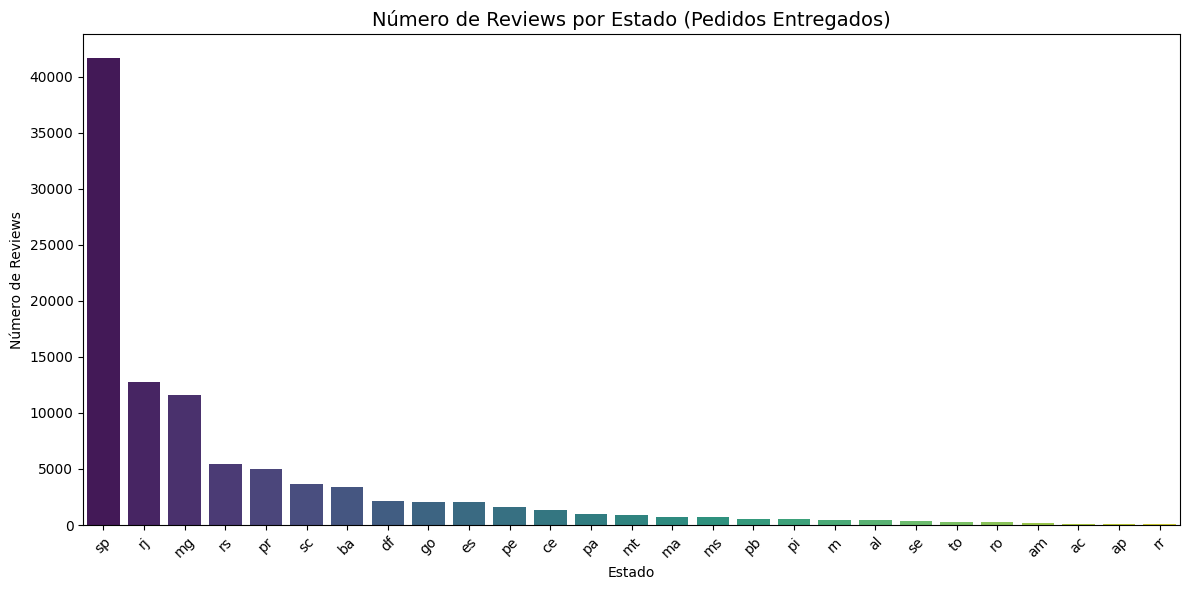

In [352]:
#Representación gráfica del número de reviews por estado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=reviews_por_estado.sort_values('num_reviews', ascending=False),
    x='customer_state', y='num_reviews',
    palette='viridis'
)
plt.title('Número de Reviews por Estado (Pedidos Entregados)', fontsize=14)
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


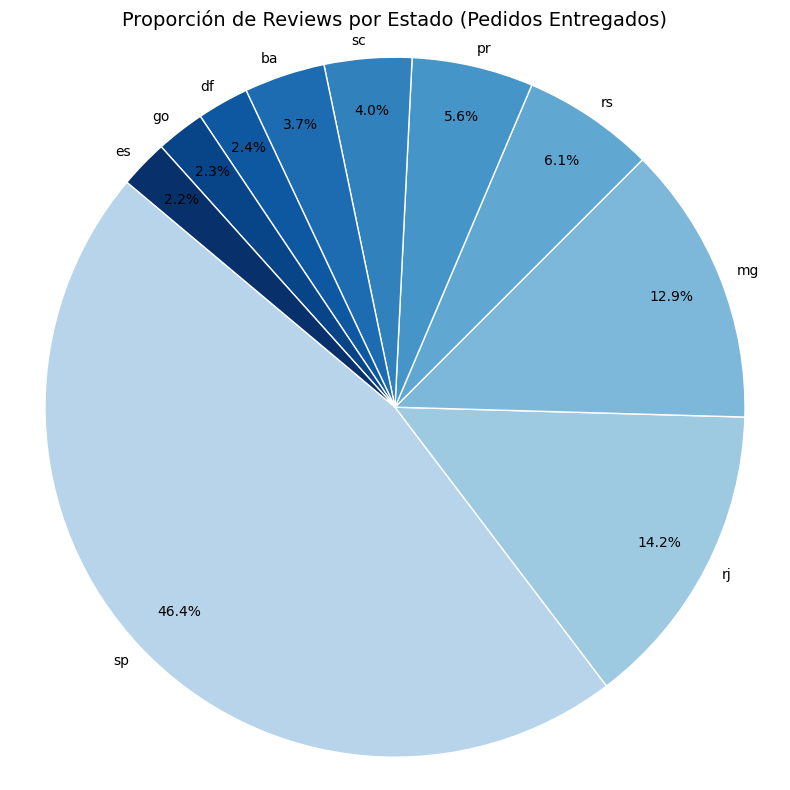

In [351]:
data = reviews_por_estado.sort_values(by='num_reviews', ascending=False).head(10)
# Gráfico circular de la proporción de reviews por estado
plt.figure(figsize=(8,8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(data)))
plt.pie(
    data['num_reviews'],
    labels=data['customer_state'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10},
    labeldistance=1.05,
    pctdistance=0.85,
    wedgeprops=dict(edgecolor='white')
    
)
plt.title('Proporción de Reviews por Estado (Pedidos Entregados)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


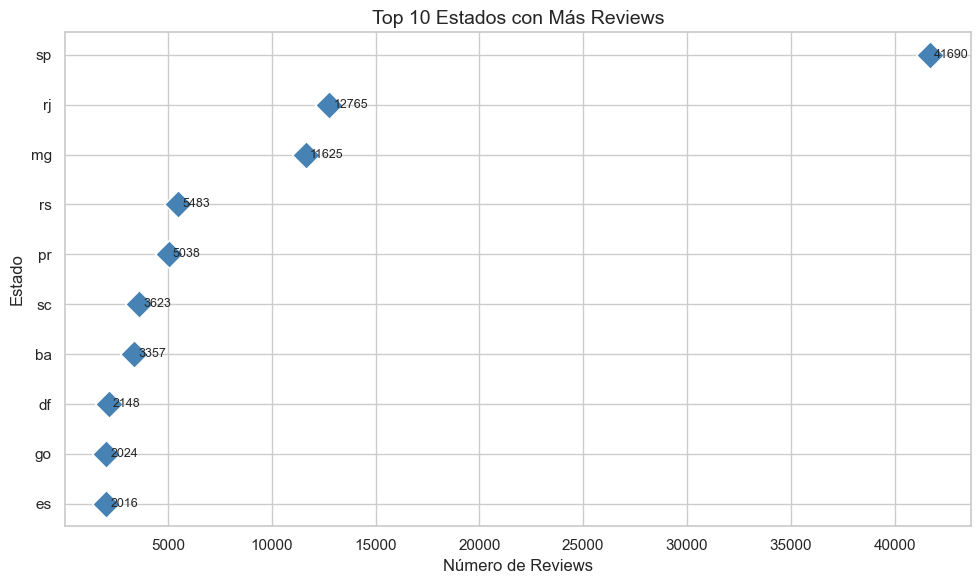

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarte de tener los datos listos
top10 = reviews_por_estado.sort_values(by='num_reviews', ascending=False).head(10)

# Configuración del estilo
sns.set(style="whitegrid")

# Crear gráfico de dispersión con rombos
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top10,
    x='num_reviews',
    y='customer_state',
    s=200,               # Tamaño de los rombos
    marker='D',          # D = diamante
    color='steelblue'
)

# Títulos y etiquetas
plt.title('Top 10 Estados con Más Reviews', fontsize=14)
plt.xlabel('Número de Reviews')
plt.ylabel('Estado')

# Mostrar valores sobre los puntos
for i in range(len(top10)):
    plt.text(top10['num_reviews'].values[i] + 200,  # un poco a la derecha del punto
             top10['customer_state'].values[i],
             str(top10['num_reviews'].values[i]),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()
